<a href="https://colab.research.google.com/github/Shuaib11-Github/Important-concepts/blob/main/Multi_Collinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi-Collinearity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer

In [2]:
data = {'a' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 101],
        'b' : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

df = pd.DataFrame(data)

In [3]:
df

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
5,6,12
6,7,14
7,8,16
8,9,18
9,101,20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


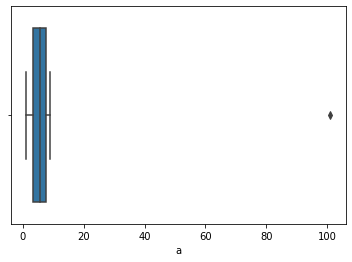

In [4]:
sns.boxplot(df['a'])

In [5]:
df['a'].values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9, 101])

In [6]:
x = np.reshape(df['a'].values, (10, 1))

In [7]:
scaler = MinMaxScaler()
scaler.fit(x)
scaler.transform(x)

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [1.  ]])

In [8]:
z = scaler.transform(x)
z = z.flatten()
z.mean(), z.std()

(0.136, 0.289039789648415)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


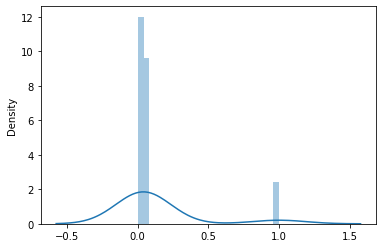

In [9]:
sns.distplot(z)

In [10]:
ss = StandardScaler()
ss.fit(x)
ss.transform(x)

array([[-0.47052345],
       [-0.43592614],
       [-0.40132883],
       [-0.36673152],
       [-0.3321342 ],
       [-0.29753689],
       [-0.26293958],
       [-0.22834226],
       [-0.19374495],
       [ 2.98920782]])

In [11]:
y = ss.transform(x)
y = y.flatten()
y

array([-0.47052345, -0.43592614, -0.40132883, -0.36673152, -0.3321342 ,
       -0.29753689, -0.26293958, -0.22834226, -0.19374495,  2.98920782])

In [12]:
y.mean().round(), y.std()

(0.0, 0.9999999999999999)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


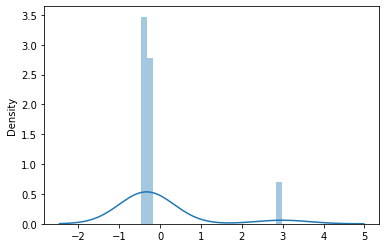

In [13]:
sns.distplot(y)

In [14]:
rs = RobustScaler(quantile_range=(25, 75))
rs.fit_transform(x)

array([[-1.        ],
       [-0.77777778],
       [-0.55555556],
       [-0.33333333],
       [-0.11111111],
       [ 0.11111111],
       [ 0.33333333],
       [ 0.55555556],
       [ 0.77777778],
       [21.22222222]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


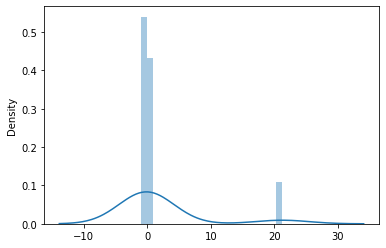

In [15]:
rsd = rs.fit_transform(x)
sns.distplot(rsd)

In [16]:
qu = QuantileTransformer(output_distribution='uniform')
qu.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (10). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (10). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


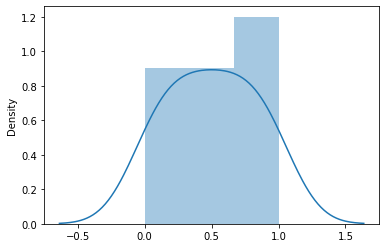

In [17]:
qud = qu.fit_transform(x)
sns.distplot(qud)

In [18]:
qg = QuantileTransformer(output_distribution='normal')
qg.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (10). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([[-5.19933758],
       [-1.22064035],
       [-0.76470967],
       [-0.4307273 ],
       [-0.1397103 ],
       [ 0.1397103 ],
       [ 0.4307273 ],
       [ 0.76470967],
       [ 1.22064035],
       [ 5.19933758]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (10). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


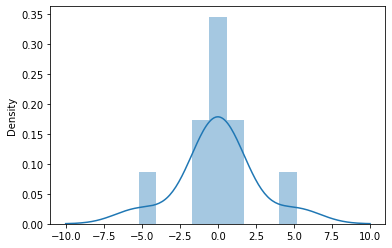

In [19]:
qgd = qg.fit_transform(x)
sns.distplot(qgd)

# Multicollinear features

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {'a' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'b' : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
        'c' : [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
        'd' : [4, 8, 12, 16, 20, 24, 28, 32, 36, 40],
        'e' : [0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0],
        'y' : [100, 110, 120, 131, 140, 153, 160, 169, 180, 190]}

df = pd.DataFrame(data)
df

,a,b,c,d,e,y
0,1,2,3,4,0.0,100
1,2,4,6,8,0.1,110
2,3,6,9,12,0.0,120
3,4,8,12,16,0.0,131
4,5,10,15,20,0.0,140
5,6,12,18,24,0.0,153
6,7,14,21,28,0.0,160
7,8,16,24,32,0.0,169
8,9,18,27,36,0.0,180
9,10,20,30,40,0.0,190


In [21]:
df.corr()

,a,b,c,d,e,y
a,1.000000,1.000000,1.000000,1.000000,-0.406181,0.999389
b,1.000000,1.000000,1.000000,1.000000,-0.406181,0.999389
c,1.000000,1.000000,1.000000,1.000000,-0.406181,0.999389
d,1.000000,1.000000,1.000000,1.000000,-0.406181,0.999389
e,-0.406181,-0.406181,-0.406181,-0.406181,1.000000,-0.410657
y,0.999389,0.999389,0.999389,0.999389,-0.410657,1.000000


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['a', 'b', 'c', 'd']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature  VIF
0       a  inf
1       b  inf
2       c  inf
3       d  inf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [23]:
X = df.drop(['e', 'y'], axis = 1)
y = df['y']

#X = df.drop(['b', 'c', 'd', 'e', 'y'], axis = 1)
#y = df['y']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [25]:
pred

array([179.72413793, 149.96551724, 100.36781609])

In [26]:
y_test

8    180
5    153
0    100
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


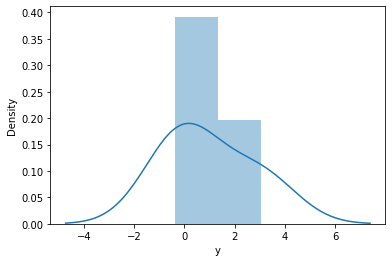

In [27]:
sns.distplot(y_test - pred)

In [28]:
t_pred = lr.predict(x_train)
t_pred

array([120.20689655, 110.28735632, 189.64367816, 169.8045977 ,
       130.12643678, 159.88505747, 140.04597701])

In [29]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, pred)
r2_train = r2_score(y_train, t_pred)
r2_test, r2_train

(0.9971565282236987, 0.9996570582578157)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


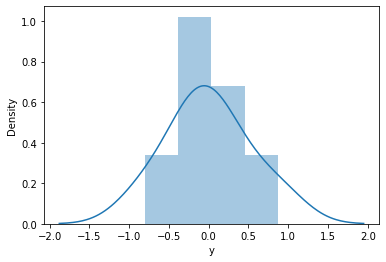

In [30]:
sns.distplot(y_train - t_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


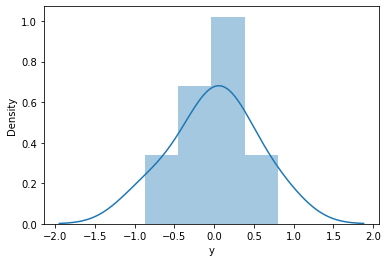

In [31]:
sns.distplot(t_pred - y_train)

In [32]:
new = np.array([[6, 12, 18, 24]])
lr.predict(new)

array([149.96551724])

In [33]:
x_train

,a,b,c,d
2,3,6,9,12
1,2,4,6,8
9,10,20,30,40
7,8,16,24,32
3,4,8,12,16
6,7,14,21,28
4,5,10,15,20


In [34]:
x_test

,a,b,c,d
8,9,18,27,36
5,6,12,18,24
0,1,2,3,4


In [35]:
lr.intercept_, lr.coef_

(90.44827586206901, array([0.33065134, 0.66130268, 0.99195402, 1.32260536]))

In [36]:
adj_r2 = (1 - (1 - r2_train) * ((x_train.shape[0] - 1) / 
          (x_train.shape[0] - x_train.shape[1] - 1)))

adj_r2

0.9989711747734471

In [37]:
adj_r2 = (1 - (1 - r2_test) * ((x_train.shape[0] - 1) / 
          (x_train.shape[0] - x_train.shape[1] - 1)))

adj_r2

0.9914695846710961

# let's see an example of no of features 1 less than no of data points.
## i.e, no.of features = no.of data points - 1

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {'a' : [1, 2, 3, 4, 5],
        #'b' : [2, 4, 6, 8, 10],
        #'c' : [3, 6, 9, 12, 15],
        #'d' : [4, 8, 12, 16, 24],
        #'e' : [0, 0.1, 0, 0.1, 0.1],
        'y' : [100, 110, 120, 131, 139]}

df = pd.DataFrame(data)
df

,a,y
0,1,100
1,2,110
2,3,120
3,4,131
4,5,139


In [39]:
df.corr()

,a,y
a,1.000000,0.999032
y,0.999032,1.000000


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df['a']

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X['a']

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X['a']))]
  
print(vif_data)

KeyError: ignored

In [41]:
X = df.drop(['y'], axis = 1)
y = df['y']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [43]:
pred

array([100.5])

In [44]:
y_test

0    100
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


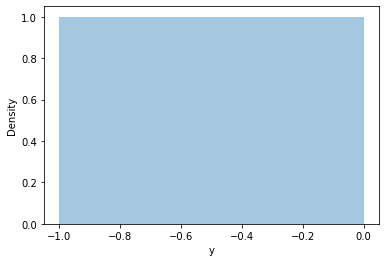

In [45]:
sns.distplot(y_test - pred)

In [46]:
t_pred = lr.predict(x_train)
t_pred

array([129.9, 120.1, 110.3, 139.7])

In [47]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, pred)
r2_train = r2_score(y_train, t_pred)
r2_test, r2_train

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


(nan, 0.9962655601659751)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


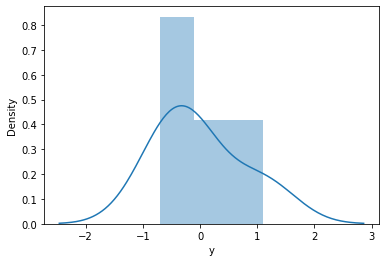

In [48]:
sns.distplot(y_train - t_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


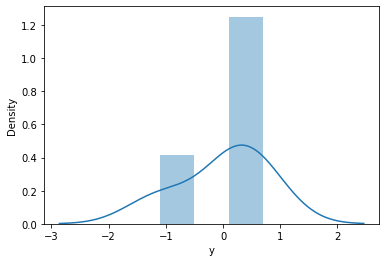

In [49]:
sns.distplot(t_pred - y_train)

In [50]:
new = np.array([[6]])
lr.predict(new)

array([149.5])

# ZeroDivisionError

- If we have no of features 1 less than no of data points then adj_r2 score deosn't make sense to calculate.
    - if no of features are 1 less than no of data points then you get Zero division error.


- Just reminding about no.of data points(n) and no of features(k or p) shouldn't be different or else you will find this Zero division error while evaluating your adj_r2 score.


- adj_r2 = (1 - (1 - r2_test) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1)))
   - here, 
       - x_train.shape[0] = n,
       - x_train.shape[1] = k
- n > k in the formula.

As shown below with an example.

In [51]:
adj_r2 = (1 - (1 - r2_train) * ((x_train.shape[0] - 1) / 
          (x_train.shape[0] - x_train.shape[1] - 1)))

adj_r2

0.9943983402489627

In [52]:
x_train.shape[0], x_train.shape[1]

(4, 1)

**Note:** 
- After doing analysis we find that feature 'e' is irrelevant feature which is not explaining about target so it is better to avoid that and go with only feature 'a'.


- And as feature 'b', 'c', 'd' are multicollinear with feature 'a', we can drop these features as they are highly correlated   and we can do analysis based on feature 'a' alone to find the target value.


### Few Consequences of Multicollinearity:

- The estimators have high variances and covariances which makes precise estimation difficult.

- Due to the above consequence in point 1, the confidence intervals tend to become wider which leads to the acceptance of the zero null hypothesis more often.

- The standard errors can be sensitive to small changes in the data.

- Coefficients become very sensitive to small changes in the model. It reduces the statistical power of the regression model.

- The effects of a single variable become difficult to distinguish from the other variables.